In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/bbrauser/Churn_Analysis/main/data/churn_data.csv')

In [11]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Basic Analysis

## What is the overall churn rate?

In [13]:
# Calculate the overall churn rate (0 = No, 1 = Yes)
overall_churn_rate = df['Churn'].value_counts(normalize=True)['Yes']

print(f"The overall churn rate is: {overall_churn_rate:.2%}")

The overall churn rate is: 26.54%


## How does the churn rate differ between make and female customers?

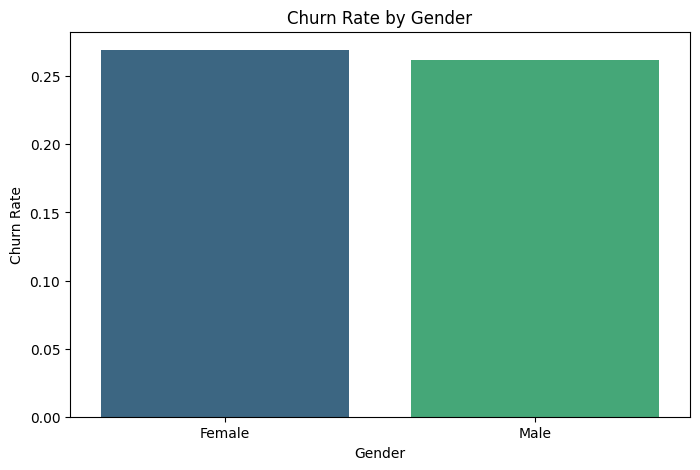

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate churn rate by gender
churn_by_gender = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()

# Plot the churn rate by gender
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_gender.index, y=churn_by_gender['Yes'], palette='viridis')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()

## What is the average tenure of customers who churned?

In [15]:
# Calculate the average tenure for customers who churned
average_tenure_churned = df[df['Churn'] == 'Yes']['tenure'].mean()

# Display the result
print(f"The average tenure of customers who churned is: {average_tenure_churned:.2f} months")

The average tenure of customers who churned is: 17.98 months


## Is there a correlation between monthly charges and churn?

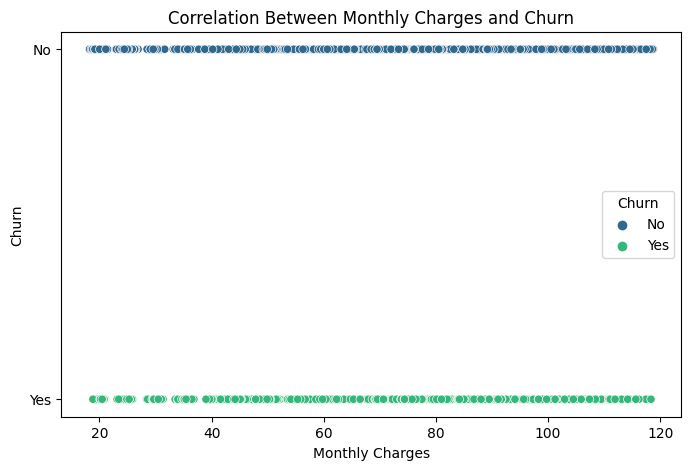

The correlation between Monthly Charges and Churn is: 0.19, indicating a very weak, positive correlation.


In [18]:
# Calculate correlation between monthly charges and churn
correlation_monthly_churn = df[['MonthlyCharges', 'Churn']].replace({'Yes': 1, 'No': 0}).corr()['MonthlyCharges']['Churn']

# Visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x='MonthlyCharges', y='Churn', data=df, hue='Churn', palette='viridis')
plt.title('Correlation Between Monthly Charges and Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn')
plt.show()

# Determine the direction of the correlation
correlation_direction = 'positive' if correlation_monthly_churn > 0 else ('negative' if correlation_monthly_churn < 0 else 'neutral')

# Determine the strength of the correlation
if abs(correlation_monthly_churn) == 1:
    correlation_strength = 'perfect'
elif abs(correlation_monthly_churn) >= 0.8:
    correlation_strength = 'very strong'
elif abs(correlation_monthly_churn) >= 0.6:
    correlation_strength = 'strong'
elif abs(correlation_monthly_churn) >= 0.4:
    correlation_strength = 'moderate'
elif abs(correlation_monthly_churn) >= 0.2:
    correlation_strength = 'weak'
elif abs(correlation_monthly_churn) > 0:
    correlation_strength = 'very weak'
else:
    correlation_strength = 'neutral'

# Display the correlation coefficient
print(f"The correlation between Monthly Charges and Churn is: {correlation_monthly_churn:.2f}, indicating a {correlation_strength}, {correlation_direction} correlation.")

# Intermediate Questions

## How does the churn rate vary across different contract types?

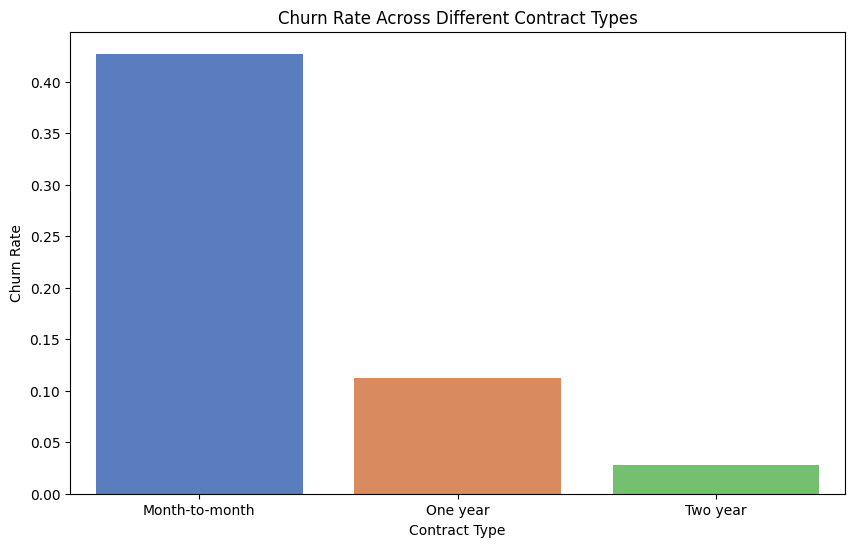

In [19]:
# Calculate churn rate by contract type
churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

# Visualize the churn rate across different contract types
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_contract.index, y=churn_by_contract['Yes'], palette='muted')
plt.title('Churn Rate Across Different Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()

## Are customers with additional services (e.g., StreamingTV, StreamingMovies) less likely to churn?

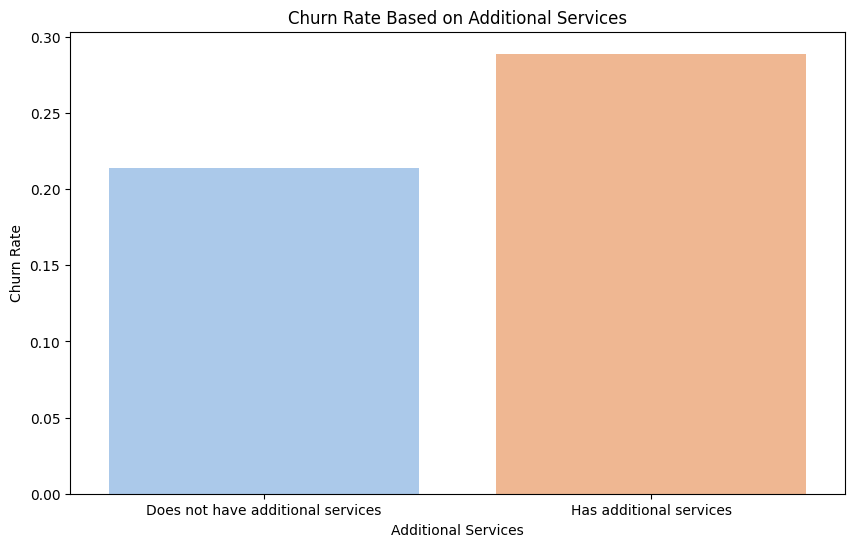

In [23]:
# List of additional services
additional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a new column 'AdditionalServices' indicating if a customer has any additional service
df['AdditionalServices'] = df[additional_services].apply(lambda row: 'Has additional services' if any(row == 'Yes') else 'Does not have additional services', axis=1)

# Calculate churn rate based on the presence of additional services
churn_by_services = df.groupby('AdditionalServices')['Churn'].value_counts(normalize=True).unstack()

# Visualize the churn rate based on additional services
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_services.index, y=churn_by_services['Yes'], palette='pastel')
plt.title('Churn Rate Based on Additional Services')
plt.xlabel('Additional Services')
plt.ylabel('Churn Rate')
plt.show()

## Does the method of payment influence churn rates?

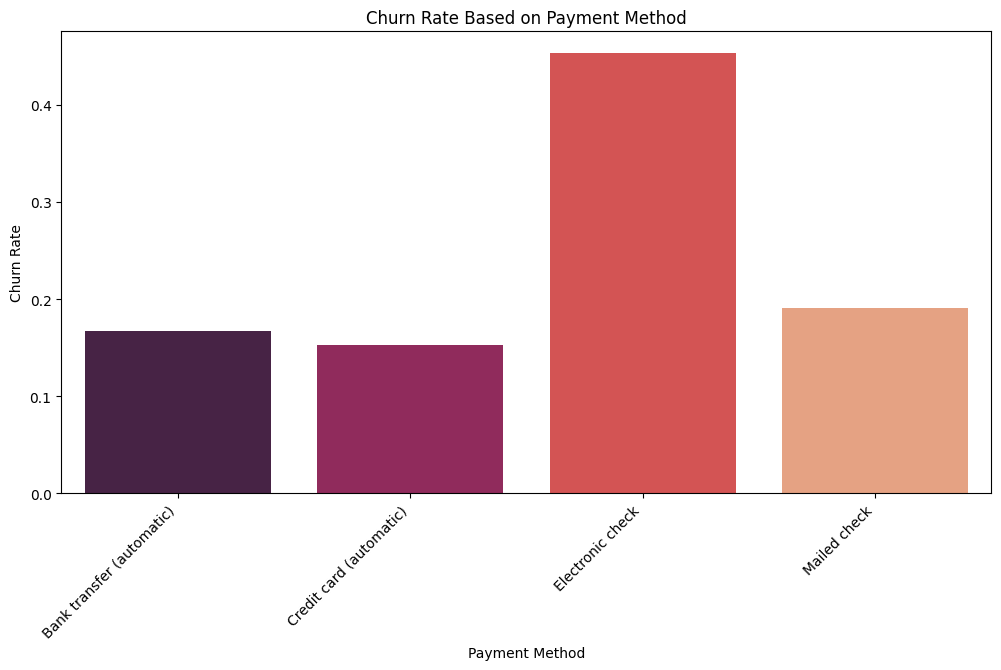

In [24]:
# Calculate churn rate by payment method
churn_by_payment = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()

# Visualize the churn rate based on payment method
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_by_payment.index, y=churn_by_payment['Yes'], palette='rocket')
plt.title('Churn Rate Based on Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

## What is the distribution of tenure for customers who churned within the first year?

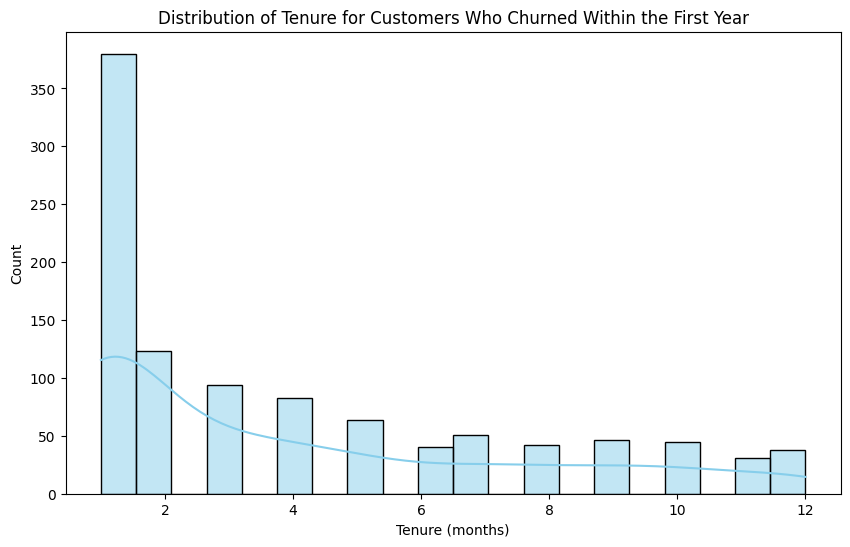

In [25]:
# Filter customers who churned within the first year
churned_first_year = df[(df['Churn'] == 'Yes') & (df['tenure'] <= 12)]

# Visualize the distribution of tenure
plt.figure(figsize=(10, 6))
sns.histplot(churned_first_year['tenure'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Tenure for Customers Who Churned Within the First Year')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()

## Are there specific demographics (age, dependents) associated with higher churn rates?

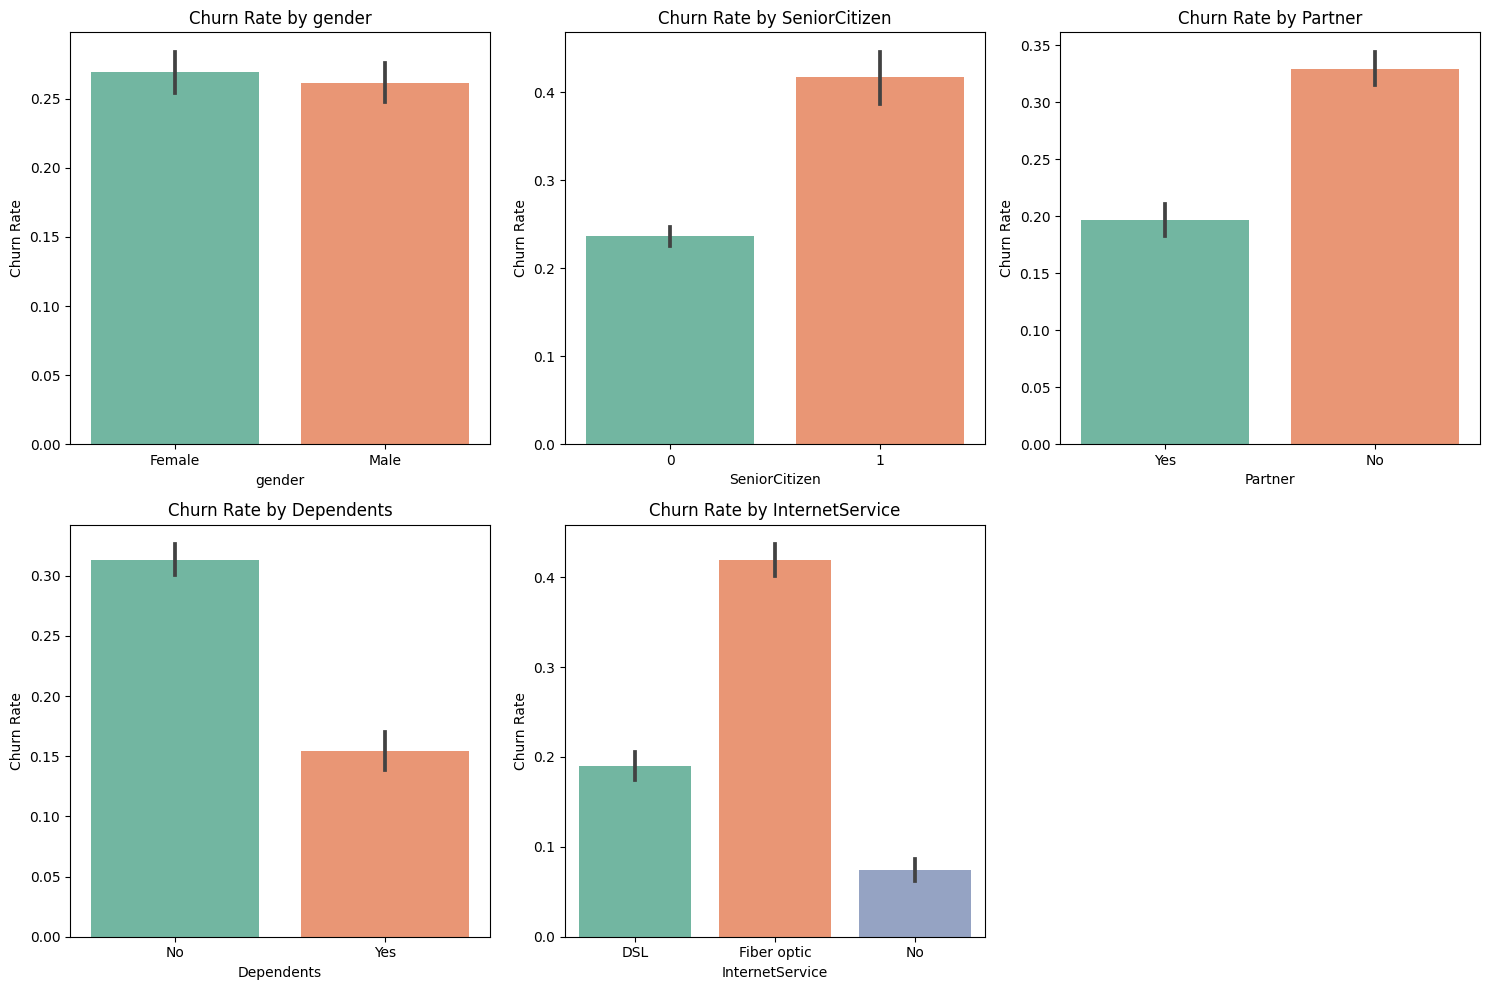

In [27]:
# Convert 'Churn' to numeric format (Yes: 1, No: 0)
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Categorical demographic variables
demographic_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService']

# Create subplots for each demographic variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(demographic_vars, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=var, y='Churn_numeric', data=df, palette='Set2')
    plt.title(f'Churn Rate by {var}')
    plt.xlabel(var)
    plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()

# Advanced

## Can we predict churn based on a combination of features using machine learning?

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X_train = pd.read_csv('https://raw.githubusercontent.com/bbrauser/Churn_Analysis/main/data/X_train.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/bbrauser/Churn_Analysis/main/data/X_test.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/bbrauser/Churn_Analysis/main/data/y_train.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/bbrauser/Churn_Analysis/main/data/y_test.csv')

# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy with Best Model: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy with Best Model: 0.80
Confusion Matrix:
[[945  88]
 [195 179]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.67      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



## What is the customer lifetime value (CLV) for different segments?

## How does customer sentiment in customer service interactions correlate with churn?

## Are there temporal patterns in churn, such as seasonality or trends over time?

## Can we identify clusters of customers with similar churn behavior using unsupervised learning?